In [ ]:
"""#구글 Colab에서 실행할 때는 이 주석을 해제하시고 실행해서 pytorch 1.0을 깔아주세요!
!pip install -q torch==1.0.0 torchvision
import torch
print(torch.__version__)
"""

In [ ]:
!pip install -q torch==1.0.0 torchvision

In [ ]:
import torch
print(torch.__version__)

1.0.0


### 1. Data Preparation

**Data Set**  
$$X_{train} \in \mathcal{R}^{50000 \times 784}, Y_{train} \in \mathcal{Z}^{50000}$$  
$$X_{val} \in \mathcal{R}^{10000 \times 784}, Y_{val} \in \mathcal{Z}^{10000}$$  
$$X_{test} \in \mathcal{R}^{10000 \times 784}, Y_{test} \in \mathcal{Z}^{10000}$$

In [ ]:
import torch
from torchvision import datasets, transforms
import torch.nn as nn


batch_size = 128
train_dataset = datasets.MNIST('./data', train=True, download=True,
                   transform=transforms.Compose([
                       transforms.ToTensor(),
                       transforms.Normalize((0.1307,), (0.3081,))
                   ]))
test_dataset =  datasets.MNIST('./data', train=False, download=True,
                   transform=transforms.Compose([
                       transforms.ToTensor(),
                       transforms.Normalize((0.1307,), (0.3081,))
                   ]))
train_dataset, val_dataset = torch.utils.data.random_split(train_dataset, [50000, 10000])
print(len(train_dataset), len(val_dataset), len(test_dataset))

train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=128, shuffle=True)
val_loader = torch.utils.data.DataLoader(val_dataset, batch_size=128, shuffle=False)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=128, shuffle=False)

9920512it [00:00, 38591516.44it/s]                             


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz


32768it [00:00, 787620.29it/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz


1654784it [00:00, 14127606.74it/s]                           

Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz


8192it [00:00, 207633.04it/s]


Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz
Processing...
Done!
50000 10000 10000


### Inspecting Dataset

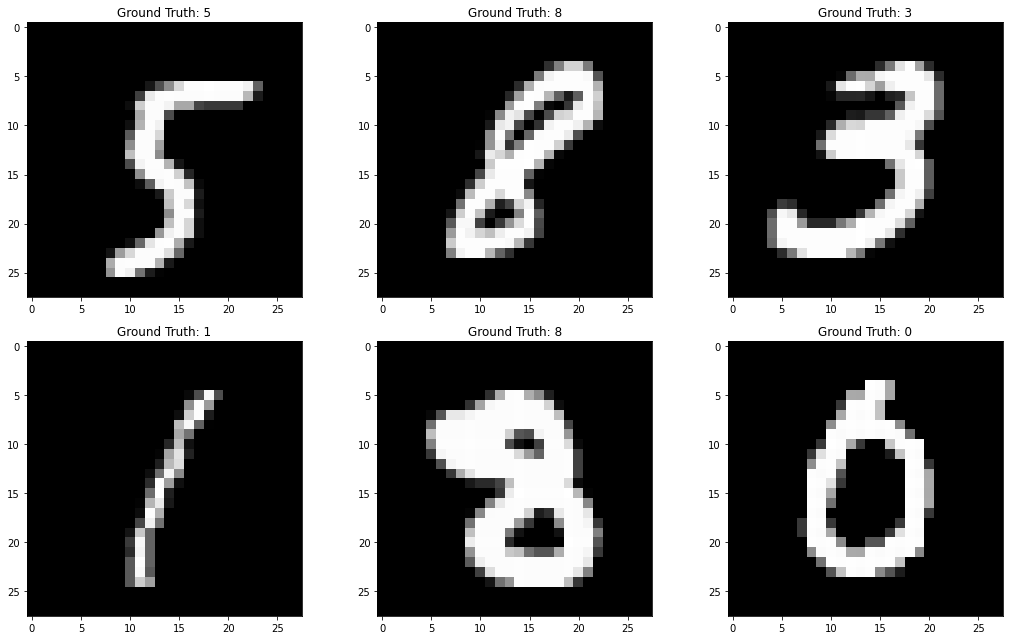

In [ ]:
examples = enumerate(train_loader)
batch_idx, (example_data, example_targets) = next(examples)  

import matplotlib.pyplot as plt

fig = plt.figure(figsize=(15, 9))
for i in range(6):
    plt.subplot(2,3,i+1)
    plt.tight_layout()
    plt.imshow(example_data[i][0], cmap='gray', interpolation='none')
    plt.title("Ground Truth: {}".format(example_targets[i]))
plt.show()

### 2. Model Architecture

In [ ]:
# MNIST 이미지 하나의 크기는 [28*28]입니다. 그리고 MNIST 데이터셋의 클래스 갯수는 10개입니다.
# 이를 참고하여 한 층으로 구성된 linear model을 생성하기 위해서 빈칸 채우세요.

class LinearModel(nn.Module):
    def __init__(self): 
        super(LinearModel, self).__init__()
        # ------------------빈 칸------------------#
        self.fc1 = nn.Linear(28 * 28, 512) # 첫번째 레이어 : 이전 레이어(Input 레이어)의 노드 갯수 (28 * 28)와 현 레이어의 노드 개수(512) 정의
        self.fc2 = nn.Linear(512, 256) # 두번째 레이어
        self.fc3 = nn.Linear(256, 10) # 마지막 레이어 (클래스 개수)
        self.ReLU = nn.ReLU()
        # -----------------------------------------#
    
    def forward(self, x):
        # ------------------빈 칸------------------#
        x = x.view(-1, 28 * 28) #펼치기
        x = self.fc1(x) # 생성자 함수에서 정의한 레이어 통과
        x = self.ReLU(x) # 활성함수 통과
        x = self.fc2(x) # 생성자 함수에서 정의한 레이어 통과
        x = self.ReLU(x) # 활성함수 통과
        x = self.fc3(x) # 생성자 함수에서 정의한 레이어 통과
        # -----------------------------------------#
        return x

### 3. Cost Function Define (Loss Function Define)  

In [ ]:
cls_loss = nn.CrossEntropyLoss()

### 4. Train & Evaluation

In [ ]:
import torch.optim as optim
from sklearn.metrics import accuracy_score


model = LinearModel()
print('Number of {} parameters'.format(sum(p.numel() for p in model.parameters() if p.requires_grad)))


lr = 0.005 
optimizer = optim.SGD(model.parameters(), lr=lr) 

list_epoch = [] 
list_train_loss = []
list_val_loss = []
list_acc = []
list_acc_epoch = []

epoch = 30
for i in range(epoch):
    
    train_loss = 0
    model.train() 
    
    for input_X, true_y in train_loader:
        optimizer.zero_grad() 
        # ------------------빈 칸------------------#
        # 입력 데이터 처리
        input_X = input_X.squeeze()
        
        # -----------------------------------------#
        pred_y = model(input_X)

        loss = cls_loss(pred_y.squeeze(), true_y)
        loss.backward() 
        optimizer.step() 
        train_loss += loss.detach().numpy()
    train_loss = train_loss / len(train_loader)
    list_train_loss.append(train_loss)
    list_epoch.append(i)
    
    
    val_loss = 0
    model.eval()

    
    with torch.no_grad(): # 
        for input_X, true_y in val_loader:
        # ------------------빈 칸------------------#
        # 입력 데이터 처리
        
            input_X = input_X.squeeze()
        # -----------------------------------------#
            pred_y = model(input_X)

            loss = cls_loss(pred_y.squeeze(), true_y)
            val_loss += loss.detach().numpy()
        val_loss = val_loss / len(val_loader)
        list_val_loss.append(val_loss)



    correct = 0
    model.eval()

    with torch.no_grad():
        for input_X, true_y in test_loader:
        # ------------------빈 칸------------------#
        # 입력 데이터 처리
        
            input_X = input_X.squeeze()
        
            pred_y = model(input_X)
        
        # 모델 출력 결과를 이용하여 모델이 이미지를 제대로 맞춘 개수를 출력하는 correct를 구현하세요
            pred_y = model(input_X).max(1, keepdim=True)[1].squeeze()
            correct += pred_y.eq(true_y).sum()        
        
        
        
        # -----------------------------------------#
        acc = correct.numpy() / len(test_loader.dataset)
        list_acc.append(acc)
        list_acc_epoch.append(i)
    
    print('Epoch: {}, Train Loss: {}, Val Loss: {}, Test Acc: {}%'.format(i, train_loss, val_loss, acc*100))

Number of 535818 parameters
Epoch: 0, Train Loss: 1.7557607643744524, Val Loss: 1.0459252211112011, Test Acc: 80.53%
Epoch: 1, Train Loss: 0.7079734291566913, Val Loss: 0.5383559182474885, Test Acc: 87.38%
Epoch: 2, Train Loss: 0.4590453051240243, Val Loss: 0.42117478726785396, Test Acc: 89.36%
Epoch: 3, Train Loss: 0.382169614781809, Val Loss: 0.37126489474049096, Test Acc: 90.25999999999999%
Epoch: 4, Train Loss: 0.3436439847168715, Val Loss: 0.34151034773905065, Test Acc: 91.22%
Epoch: 5, Train Loss: 0.31842851067138145, Val Loss: 0.3215519859443737, Test Acc: 91.64%
Epoch: 6, Train Loss: 0.29953421911467676, Val Loss: 0.30632933710194843, Test Acc: 91.97999999999999%
Epoch: 7, Train Loss: 0.2840066341030628, Val Loss: 0.293504803429676, Test Acc: 92.24%
Epoch: 8, Train Loss: 0.2709843372864187, Val Loss: 0.2811525980883007, Test Acc: 92.55%
Epoch: 9, Train Loss: 0.2594812750397131, Val Loss: 0.27266353651692593, Test Acc: 92.65%
Epoch: 10, Train Loss: 0.24907795408421465, Val Loss:

### 5. Report Experiment  

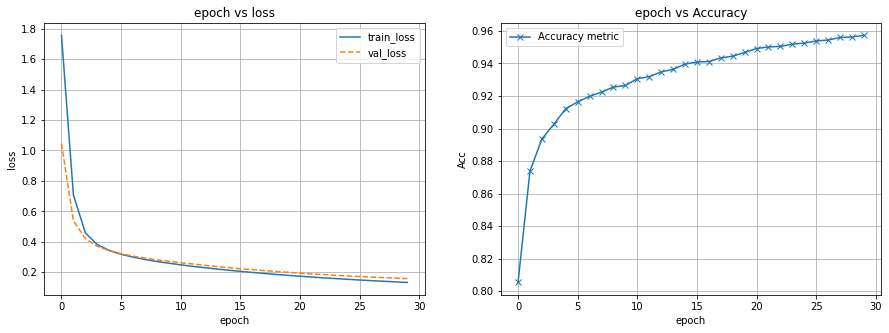

In [ ]:
fig = plt.figure(figsize=(15,5))

# ====== Loss Fluctuation ====== #
ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(list_epoch, list_train_loss, label='train_loss')
ax1.plot(list_epoch, list_val_loss, '--', label='val_loss')
ax1.set_xlabel('epoch')
ax1.set_ylabel('loss')
ax1.grid()
ax1.legend()
ax1.set_title('epoch vs loss')

# ====== Metric Fluctuation ====== #
ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(list_acc_epoch, list_acc, marker='x', label='Accuracy metric')
ax2.set_xlabel('epoch')
ax2.set_ylabel('Acc')
ax2.grid()
ax2.legend()
ax2.set_title('epoch vs Accuracy')

plt.show()